
# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [12]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


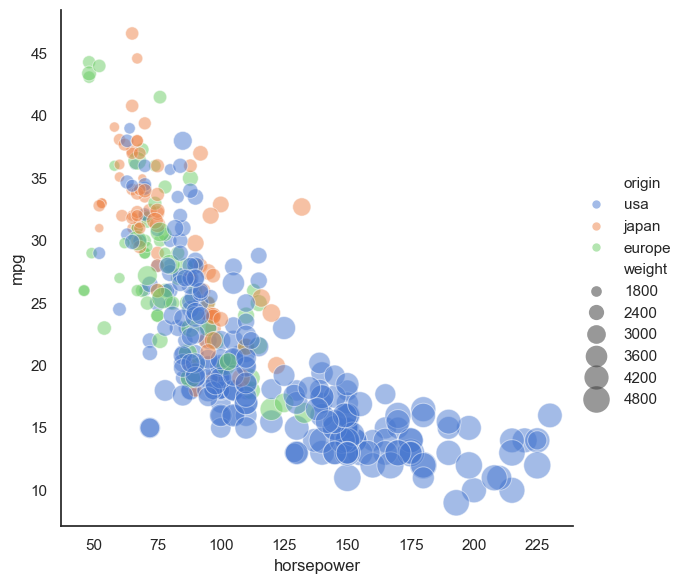

In [13]:


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

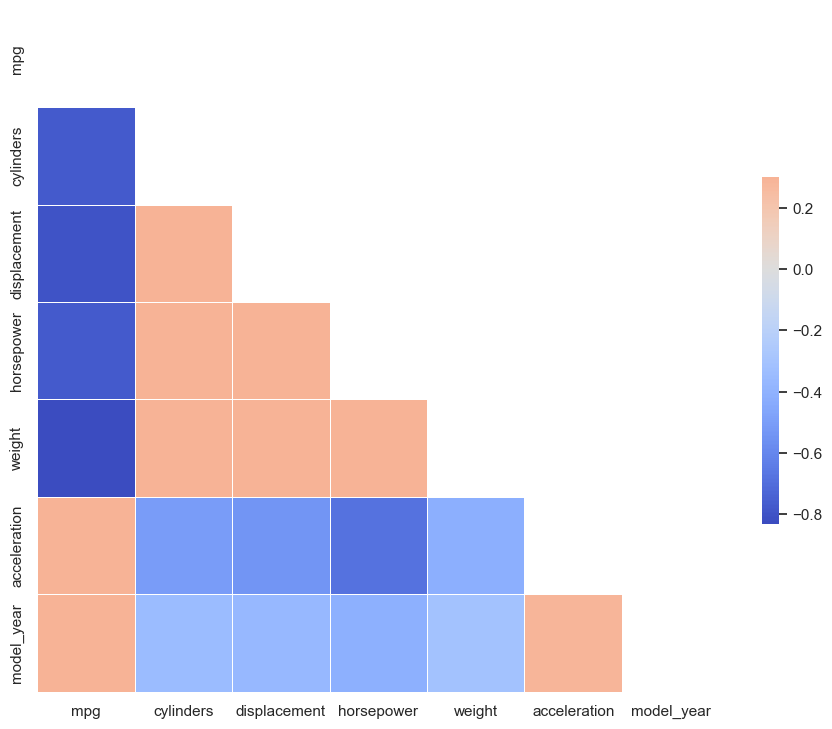

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Manejar valores nulos en la columna 'horsepower'
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())

# Excluir columnas no numéricas antes de calcular la matriz de correlación
numeric_mpg = mpg.select_dtypes(include=[np.number])
corr = numeric_mpg.corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Definir el colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

3) (1 punto) Entrenar un modelo de regresion lineal


In [15]:
# definir x e y
import pandas as pd 
X = mpg[['weight', 'horsepower']]  # variables independientes
y = mpg['mpg']                     # variable dependiente


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

Desempeño del Modelo:
R²:   0.728
MAE:  3.12
MSE:  14.61
RMSE: 3.82


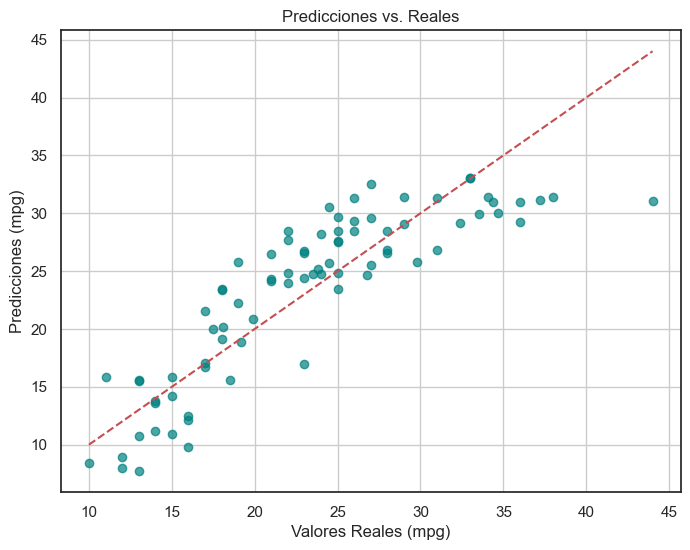

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes y_test y y_pred

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Desempeño del Modelo:")
print(f"R²:   {r2:.3f}") # Coeficiente de determinación
print(f"MAE:  {mae:.2f}") # Error absoluto medio
print(f"MSE:  {mse:.2f}") # Error cuadrático medio
print(f"RMSE: {rmse:.2f}") # Raíz del error cuadrático medio

# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.xlabel('Valores Reales (mpg)')
plt.ylabel('Predicciones (mpg)')
plt.title('Predicciones vs. Reales')
plt.grid(True)
plt.show()


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


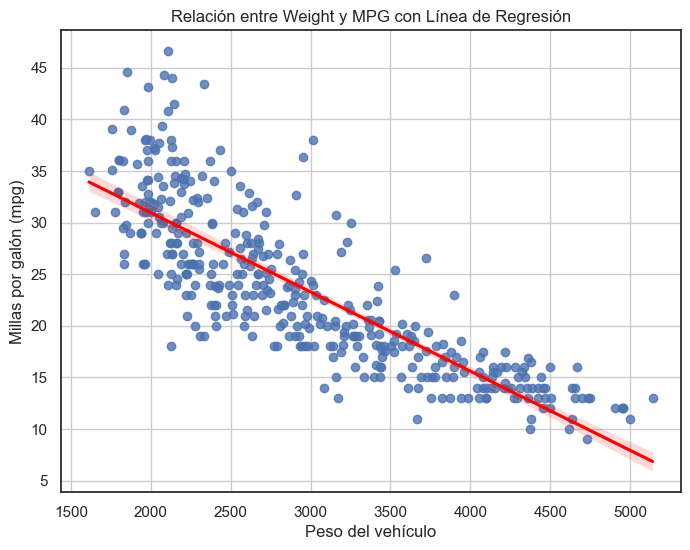

In [18]:
# Crear gráfico
plt.figure(figsize=(8,6))
sns.regplot(data=mpg, x='weight', y='mpg', line_kws={"color": "red"})
plt.title('Relación entre Weight y MPG con Línea de Regresión')
plt.xlabel('Peso del vehículo')
plt.ylabel('Millas por galón (mpg)')
plt.grid(True)
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.